In [159]:
# Stock Price Prediction Using Machine Learning
# Stock Price Prediction Using Decision Tree & Linear Regression

In [195]:
### Data Collection
import pandas_datareader as pdr
key=""                             ## Get api-key from pandas_datareader for alpha vantage dataset

In [197]:
df = pdr.get_data_alphavantage('AAPL', api_key='') ## Use api-key also we can directly upload CSV

In [198]:
df.to_csv('AAPL.csv')

In [199]:
import pandas as pd

In [200]:
df=pd.read_csv('AAPL.csv')

In [201]:
df.head(8)

,Unnamed: 0,open,high,low,close,volume
0,2000-08-09,48.13,48.44,47.25,47.50,6779300
1,2000-08-10,48.00,48.44,47.38,47.56,4494900
2,2000-08-11,46.84,48.00,45.56,47.69,4251000
3,2000-08-14,47.59,47.69,46.31,47.06,2797500
4,2000-08-15,47.25,47.94,46.50,46.69,2039300
5,2000-08-16,46.88,49.00,46.81,48.50,2565600
6,2000-08-17,48.38,52.44,48.31,51.44,4837500
7,2000-08-18,51.38,51.81,49.88,50.00,3396000


In [202]:
df.tail(5)

,Unnamed: 0,open,high,low,close,volume
5022,2020-07-28,377.470,378.1986,372.99,373.01,25906375
5023,2020-07-29,375.000,380.9200,374.85,380.16,22582314
5024,2020-07-30,376.750,385.1900,375.07,384.76,39532505
5025,2020-07-31,411.535,425.6600,403.30,425.04,93573867
5026,2020-08-03,432.800,446.5457,431.57,435.75,76817302


In [203]:
df.head()

,Unnamed: 0,open,high,low,close,volume
0,2000-08-09,48.13,48.44,47.25,47.50,6779300
1,2000-08-10,48.00,48.44,47.38,47.56,4494900
2,2000-08-11,46.84,48.00,45.56,47.69,4251000
3,2000-08-14,47.59,47.69,46.31,47.06,2797500
4,2000-08-15,47.25,47.94,46.50,46.69,2039300


In [204]:
# Get the number of training days
df.shape

(5027, 6)

In [205]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

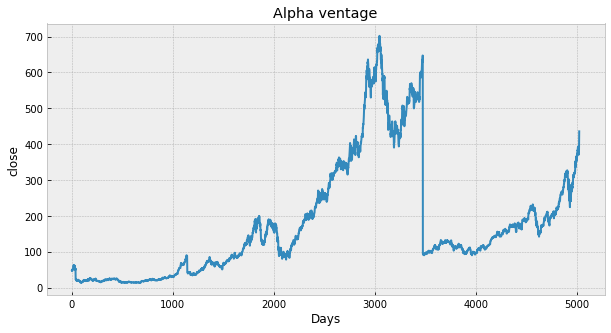

In [206]:
# Visualise the close price data
plt.figure(figsize=(10,5))
plt.title('Alpha ventage')
plt.xlabel('Days')
plt.ylabel('close')
plt.plot(df['close'])
plt.show()

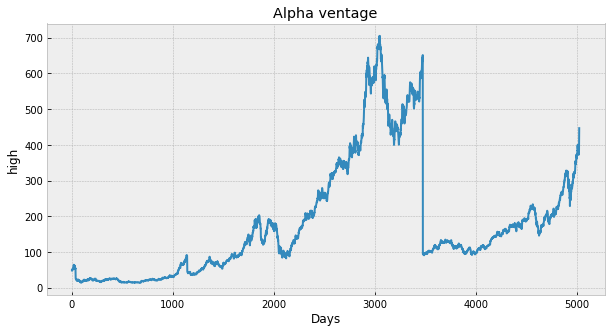

In [207]:
# Visualise the high price data
plt.figure(figsize=(10,5))
plt.title('Alpha ventage')
plt.xlabel('Days')
plt.ylabel('high')
plt.plot(df['high'])
plt.show()

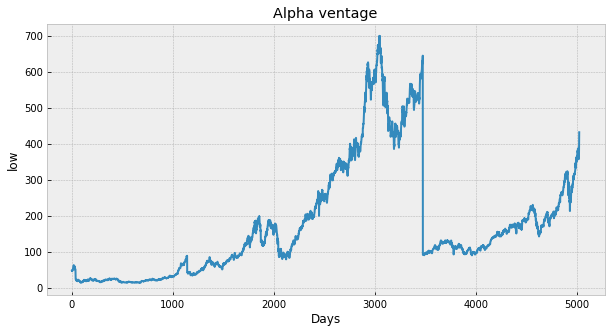

In [208]:
# Visualise the low price data
plt.figure(figsize=(10,5))
plt.title('Alpha ventage')
plt.xlabel('Days')
plt.ylabel('low')
plt.plot(df['low'])
plt.show()

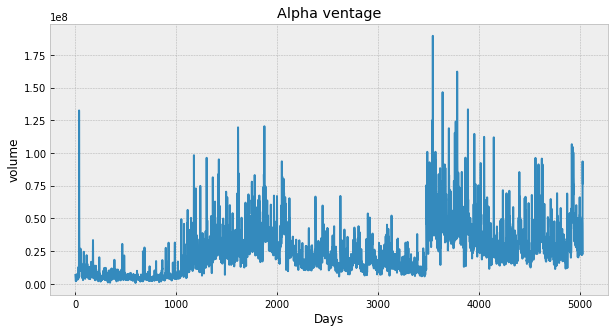

In [209]:
# Visualise the volume  data
plt.figure(figsize=(10,5))
plt.title('Alpha ventage')
plt.xlabel('Days')
plt.ylabel('volume')
plt.plot(df['volume'])
plt.show()

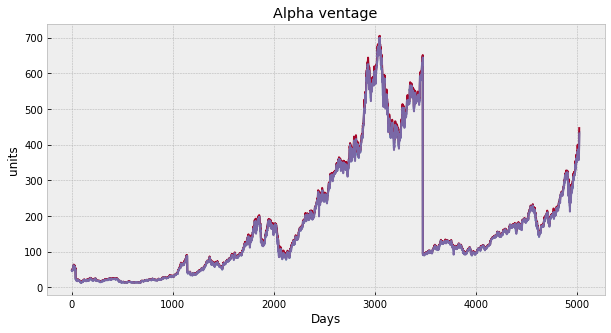

In [210]:
# Visualise the price data
plt.figure(figsize=(10,5))
plt.title('Alpha ventage')
plt.xlabel('Days')
plt.ylabel('units')
plt.plot(df[['close' , 'high' , 'low']])
plt.show()

In [211]:
# Get the close price
df = df[['close']]
df.head(10)

,close
0,47.50
1,47.56
2,47.69
3,47.06
4,46.69
5,48.50
6,51.44
7,50.00
8,50.50
9,51.69


In [212]:
# Create a variable to predict 'x' days out into the future
future_days = 3
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['close']].shift(-future_days)
df.tail(5)

,close,Prediction
5022,373.01,425.04
5023,380.16,435.75
5024,384.76,NaN
5025,425.04,NaN
5026,435.75,NaN


In [213]:
import numpy as np

In [214]:
# Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 47.5 ]
 [ 47.56]
 [ 47.69]
 ...
 [379.24]
 [373.01]
 [380.16]]


In [215]:
# Create the target data set (y) and convert it to numpy array and get all the target values except the last 'x' rows 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 47.06  46.69  48.5  ... 384.76 425.04 435.75]


In [216]:
from sklearn.model_selection import train_test_split

In [217]:
# split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [218]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


In [219]:
# Create the models
# Create Desion tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)
# Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)


In [220]:
# Get last rows of future data set
X_future = df.drop(['Prediction'], 1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[379.24],
       [373.01],
       [380.16]])

In [221]:
# Show the model tree prediction
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[384.76 425.04 435.75]

[378.1690043  371.97581006 379.0835691 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


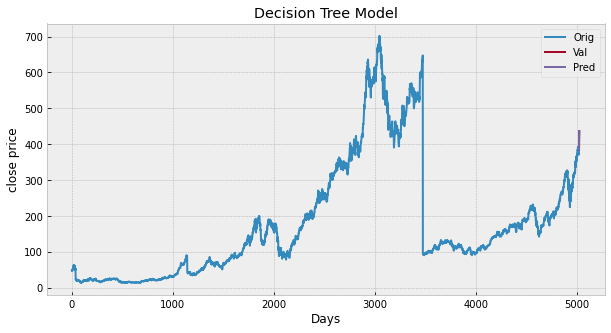

In [251]:
# Visulize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(10,5))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['close'])
plt.plot(valid[['close' , 'Prediction']])
plt.legend(['Orig', 'Val' , 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


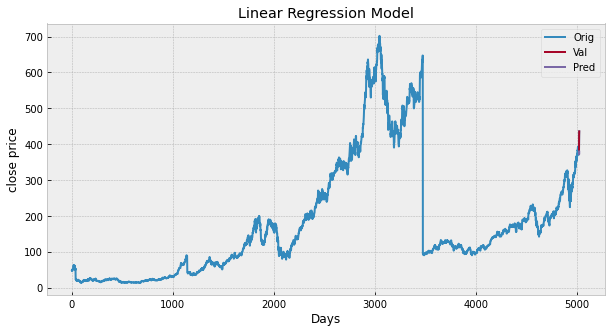

In [252]:
# Visulize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(10,5))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['close'])
plt.plot(valid[['close' , 'Prediction']])
plt.legend(['Orig', 'Val' , 'Pred'])
plt.show()

In [ ]:
# Stock Price Prediction Using LSTM

In [225]:
### Data Collection
import pandas_datareader as pdr
key=""             ##Get api-key from pandas_datareader for alpha vantage dataset

In [226]:
df = pdr.get_data_alphavantage('AAPL', api_key='')  ## Use api-key also we can directly upload CSV

In [227]:
df.to_csv('AAPL.csv')

In [228]:
import pandas as pd

In [229]:
df=pd.read_csv('AAPL.csv')

In [230]:
df.head(8)

,Unnamed: 0,open,high,low,close,volume
0,2000-08-09,48.13,48.44,47.25,47.50,6779300
1,2000-08-10,48.00,48.44,47.38,47.56,4494900
2,2000-08-11,46.84,48.00,45.56,47.69,4251000
3,2000-08-14,47.59,47.69,46.31,47.06,2797500
4,2000-08-15,47.25,47.94,46.50,46.69,2039300
5,2000-08-16,46.88,49.00,46.81,48.50,2565600
6,2000-08-17,48.38,52.44,48.31,51.44,4837500
7,2000-08-18,51.38,51.81,49.88,50.00,3396000


In [231]:
df.tail(5)

,Unnamed: 0,open,high,low,close,volume
5022,2020-07-28,377.470,378.1986,372.99,373.01,25906375
5023,2020-07-29,375.000,380.9200,374.85,380.16,22582314
5024,2020-07-30,376.750,385.1900,375.07,384.76,39532505
5025,2020-07-31,411.535,425.6600,403.30,425.04,93573867
5026,2020-08-03,432.800,446.5457,431.57,435.75,76817302


In [232]:
df1=df.reset_index()['close']

In [ ]:
df1

0        47.50
1        47.56
2        47.69
3        47.06
4        46.69
         ...  
5022    373.01
5023    380.16
5024    384.76
5025    425.04
5026    435.75
Name: close, Length: 5027, dtype: float64

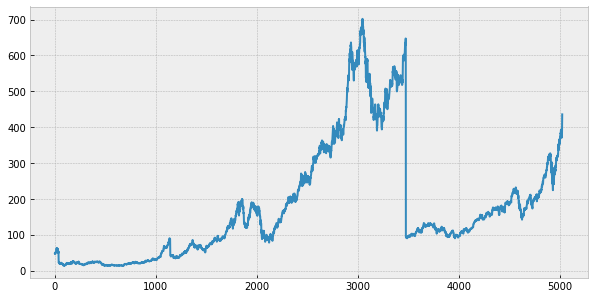

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df1)

In [235]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
import numpy as np

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [237]:
print(df1)

[[0.04989985]
 [0.04998694]
 [0.05017562]
 ...
 [0.53940608]
 [0.59786931]
 [0.61341403]]


In [238]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [239]:
training_size,test_size

(4021, 1006)

In [240]:
train_data

array([[0.04989985],
       [0.04998694],
       [0.05017562],
       ...,
       [0.13488055],
       [0.13260182],
       [0.13450318]])

In [241]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [242]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [243]:
print(X_train.shape), print(y_train.shape)

(3920, 100)
(3920,)


(None, None)

In [244]:
print(X_test.shape), print(ytest.shape)


(905, 100)
(905,)


(None, None)

In [245]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [246]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [248]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [249]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [250]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
62/62 [==============================] - 12s 195ms/step - loss: 0.0113 - val_loss: 2.7345e-04
Epoch 2/100
62/62 [==============================] - 13s 203ms/step - loss: 0.0016 - val_loss: 3.9888e-04
Epoch 3/100
62/62 [==============================] - 13s 206ms/step - loss: 0.0013 - val_loss: 6.7458e-04
Epoch 4/100
62/62 [==============================] - 12s 195ms/step - loss: 0.0013 - val_loss: 1.7302e-04
Epoch 5/100
62/62 [==============================] - 13s 202ms/step - loss: 0.0011 - val_loss: 1.6964e-04
Epoch 6/100
62/62 [==============================] - 12s 200ms/step - loss: 0.0011 - val_loss: 5.4195e-04
Epoch 7/100
62/62 [==============================] - 14s 218ms/step - loss: 0.0011 - val_loss: 1.8513e-04
Epoch 8/100
62/62 [==============================] - 12s 195ms/step - loss: 9.1700e-04 - val_loss: 1.3260e-04
Epoch 9/100
62/62 [==============================] - 13s 204ms/step - loss: 0.0011 - val_loss: 2.8966e-04
Epoch 10/100
62/62 [======================

In [253]:
import tensorflow as tf

In [254]:
tf.__version__

'2.3.0'

In [255]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [256]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [257]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

252.0541933922481

In [258]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

212.23303031335152

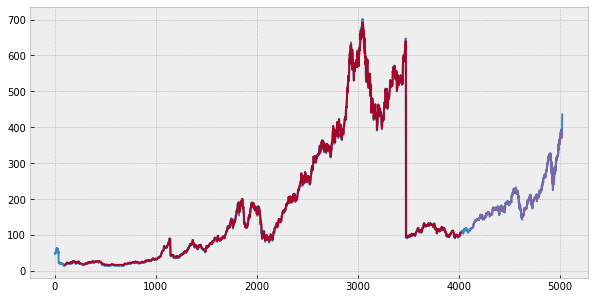

In [260]:
### Plotting 
# shift train predictions for plotting
plt.figure(figsize=(10,5))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [261]:
len(test_data)

1006

In [262]:
x_input=test_data[906:].reshape(1,-1)
x_input.shape

(1, 100)

In [263]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [264]:
temp_input

[0.34124357746233563,
 0.3844088362506895,
 0.3325060233969056,
 0.3479636564196349,
 0.33897936079421753,
 0.33623617521553606,
 0.31368109379082126,
 0.3066126738076577,
 0.33928415919184884,
 0.33731022671195104,
 0.35606258527098034,
 0.340532381201196,
 0.3507939272547825,
 0.35003918836540976,
 0.33061917617347386,
 0.33645388835670126,
 0.3313448866440245,
 0.36191181166361874,
 0.35749949200267067,
 0.3671369270515835,
 0.36992365525849813,
 0.37755812940869116,
 0.3975877383958896,
 0.3937850155302041,
 0.3970652268570931,
 0.39141919939620895,
 0.38289935847194406,
 0.3704751952161166,
 0.38169467909083,
 0.38014165868385147,
 0.39166594095619617,
 0.39195622514441647,
 0.38529420302476125,
 0.39857470463583855,
 0.4073848297483237,
 0.40051960869691433,
 0.40645592034601885,
 0.41284217248686467,
 0.41729803477604577,
 0.42181195390287096,
 0.4310865337165085,
 0.438169467909083,
 0.43294435252111824,
 0.42748700978257714,
 0.4302301953612587,
 0.42757409503904326,
 0.438096

In [265]:
# demonstrate prediction for next 3 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<3):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.61539274]
101
1 day input [0.38440884 0.33250602 0.34796366 0.33897936 0.33623618 0.31368109
 0.30661267 0.33928416 0.33731023 0.35606259 0.34053238 0.35079393
 0.35003919 0.33061918 0.33645389 0.33134489 0.36191181 0.35749949
 0.36713693 0.36992366 0.37755813 0.39758774 0.39378502 0.39706523
 0.3914192  0.38289936 0.3704752  0.38169468 0.38014166 0.39166594
 0.39195623 0.3852942  0.3985747  0.40738483 0.40051961 0.40645592
 0.41284217 0.41729803 0.42181195 0.43108653 0.43816947 0.43294435
 0.42748701 0.4302302  0.4275741  0.4380969  0.43545531 0.44429446
 0.44084008 0.44380098 0.44066591 0.44266887 0.44287207 0.44242213
 0.44809719 0.4502598  0.45284333 0.44877935 0.4621034  0.46494818
 0.48023165 0.49307672 0.46848965 0.47269877 0.47878023 0.49197364
 0.49126245 0.49146564 0.48854829 0.50182879 0.51294667 0.50355598
 0.51049377 0.49422334 0.50605243 0.51043572 0.50943424 0.50943424
 0.52357108 0.52188743 0.53448576 0.53686609 0.53783854 0.53526953
 0.54444251 0.5483178  0.54133647

In [266]:
day_new=np.arange(1,101)
day_pred=np.arange(101,104)

In [267]:
import matplotlib.pyplot as plt

In [268]:
len(df1)

5027

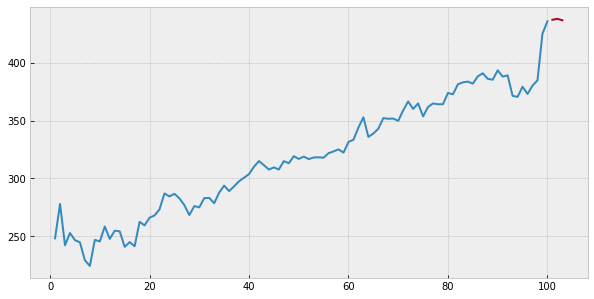

In [269]:
plt.figure(figsize=(10,5))
plt.plot(day_new,scaler.inverse_transform(df1[4927:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

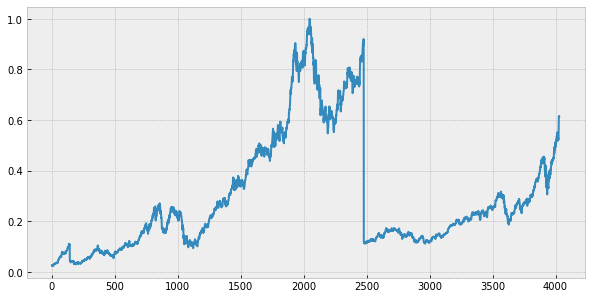

In [270]:
plt.figure(figsize=(10,5))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

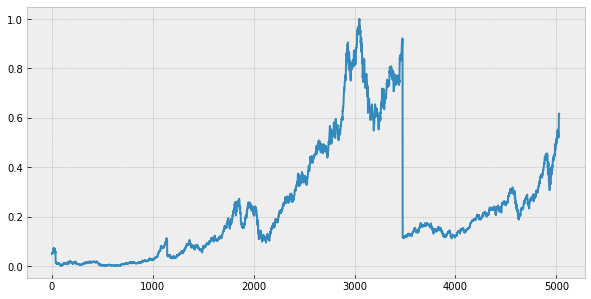

In [271]:
plt.figure(figsize=(10,5))
plt.plot(df3)

In [ ]:
# This is  Machine Learning model for stock price prediction for next 3 days.